In [23]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# classifier for fertilizer_prediction.csv

In [34]:
df = pd.read_csv("../datasets/fertilizer_prediction.csv") 
df

,Temperature,Humidity,Moisture,pH,N,P,K,Crop,Fertilizer
0,32.0,60.0,45.0,6.0,0.4,0.5,0.8,Maize,Good NPK
1,35.0,66.0,48.0,5.8,0.2,0.7,0.6,Maize,MOP
2,35.0,66.0,48.0,5.8,0.2,0.7,0.6,Maize,Urea
3,29.0,36.0,17.0,6.5,0.3,0.7,0.6,Maize,MOP
4,29.0,36.0,17.0,6.5,0.3,0.7,0.6,Maize,Urea
...,...,...,...,...,...,...,...,...,...
1915,31.0,48.0,66.0,6.0,0.8,0.8,0.9,Sugarcane,Good NPK
1916,31.0,48.0,66.0,6.0,0.9,0.8,0.9,Sugarcane,Good NPK
1917,35.0,54.0,71.0,6.4,0.7,0.9,0.9,Sugarcane,Good NPK
1918,35.0,54.0,71.0,6.4,0.8,0.9,0.9,Sugarcane,Good NPK


In [31]:
df.to_csv('../datasets/fertilizer_prediction.csv', index=False)

In [33]:
label_encoder = LabelEncoder() 
df['target_crop']= label_encoder.fit_transform(df['Crop']) 
df['target_fertilizer']= label_encoder.fit_transform(df['Fertilizer']) 
df

,Temperature,Humidity,Moisture,pH,N,P,K,Crop,Fertilizer,target_crop,target_fertilizer
0,32.0,60.0,45.0,6.0,0.4,0.5,0.8,Maize,Good NPK,4,1
1,35.0,66.0,48.0,5.8,0.2,0.7,0.6,Maize,MOP,4,2
2,35.0,66.0,48.0,5.8,0.2,0.7,0.6,Maize,Urea,4,3
3,29.0,36.0,17.0,6.5,0.3,0.7,0.6,Maize,MOP,4,2
4,29.0,36.0,17.0,6.5,0.3,0.7,0.6,Maize,Urea,4,3
...,...,...,...,...,...,...,...,...,...,...,...
2123,31.0,48.0,66.0,6.0,0.8,0.8,0.9,Sugarcane,Good NPK,6,1
2124,31.0,48.0,66.0,6.0,0.9,0.8,0.9,Sugarcane,Good NPK,6,1
2125,35.0,54.0,71.0,6.4,0.7,0.9,0.9,Sugarcane,Good NPK,6,1
2126,35.0,54.0,71.0,6.4,0.8,0.9,0.9,Sugarcane,Good NPK,6,1


In [43]:
for column in df.columns[:-1]:
    df[column] = (df[column] - df[column].mean()) / df[column].std()	
df

,Temperature,Humidity,Moisture,pH,N,P,K,Crop
0,-0.002202,0.583392,0.392897,-0.285043,-0.551978,-0.318270,1.800502,6
1,0.737683,1.060540,0.608088,-0.648695,-1.297998,0.610782,0.938626,6
2,0.737683,1.060540,0.608088,-0.648695,-1.297998,0.610782,0.938626,6
3,-0.742087,-1.325199,-1.615544,0.624087,-0.924988,0.610782,0.938626,6
4,-0.742087,-1.325199,-1.615544,0.624087,-0.924988,0.610782,0.938626,6
...,...,...,...,...,...,...,...,...
2123,-0.248831,-0.370903,1.899229,-0.285043,0.940063,1.075308,2.231440,8
2124,-0.248831,-0.370903,1.899229,-0.285043,1.313073,1.075308,2.231440,8
2125,0.737683,0.106245,2.257879,0.442261,0.567053,1.539835,2.231440,8
2126,0.737683,0.106245,2.257879,0.442261,0.940063,1.539835,2.231440,8


In [44]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)
accuracy = accuracy_score(predictions, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.924812030075188


# classifier for crop_recommendation.csv

In [11]:
df = pd.read_csv("../datasets/crop_recommendation.csv") 
df

,N,P,K,Temperature,Humidity,pH,Moisture,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


In [12]:
df = df.drop_duplicates()
df

,N,P,K,Temperature,Humidity,pH,Moisture,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


In [13]:
label_encoder = LabelEncoder() 
df['target_crop']= label_encoder.fit_transform(df['Crop']) 
df

,N,P,K,Temperature,Humidity,pH,Moisture,Crop,target_crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,20
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee,5


In [14]:
X = df[df.columns[:-2]]
y = df[df.columns[-1]]
display(X, y)

,N,P,K,Temperature,Humidity,pH,Moisture
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: target_crop, Length: 2200, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9981818181818182


In [17]:
df['Crop'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [18]:
df['Crop'].value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

# classifier for Crop_Recommendation.csv

In [ ]:
df = pd.read_csv("../datasets/Crop_Recommendation.csv") 
df = df.drop_duplicates()
df

In [ ]:
label_encoder = LabelEncoder() 
  
df['Crop']= label_encoder.fit_transform(df['Crop']) 

In [ ]:
df_z_scaled = df.copy() 

# apply normalization technique to Column 1 
# columns = ['Rain Fall (mm)', 'Fertilizer'	,'Temperatue','Nitrogen (N)'	,'Phosphorus (P)'	,'Potassium (K)', 'Yeild (Q/acre)']
for column in df.columns[:-1]:
    df_z_scaled[column] = (df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()	
 

# view normalized data 
display(df_z_scaled)

In [ ]:
X = df_z_scaled[['Temperature','Humidity','pH_Value','Rainfall','Nitrogen','Potassium','Phosphorus']]
y = df_z_scaled['Crop']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)
accuracy = accuracy_score(predictions, y_test)
print(f"Accuracy: {accuracy}")

# classifier for Dataset.csv

In [47]:
df = pd.read_csv("../datasets/Dataset.csv") 
df

,Temperature,Humidity,Rainfall,pH,N,P,K,Crop,Fertilizer
0,24.87,82.84,295.61,6.59,4.0,2.0,2.5,rice,DAP
1,24.87,82.84,295.61,6.59,4.0,2.0,2.5,rice,MOP
2,28.69,96.65,178.96,6.08,4.0,4.0,4.0,Coconut,Good NPK
3,20.27,81.64,270.44,5.01,4.0,4.0,2.0,rice,MOP
4,25.07,95.02,192.90,5.55,2.0,2.1,3.5,Coconut,Urea
...,...,...,...,...,...,...,...,...,...
290,24.17,83.73,257.03,5.58,2.0,2.1,3.5,rice,Urea
291,24.17,83.73,257.03,5.58,2.0,2.1,3.5,rice,DAP
292,26.23,83.84,286.51,5.54,4.2,2.3,3.2,rice,DAP
293,23.83,84.81,298.56,6.27,2.5,4.0,2.0,rice,Urea


In [48]:
df = df.drop_duplicates()
df

,Temperature,Humidity,Rainfall,pH,N,P,K,Crop,Fertilizer
0,24.87,82.84,295.61,6.59,4.0,2.0,2.5,rice,DAP
1,24.87,82.84,295.61,6.59,4.0,2.0,2.5,rice,MOP
2,28.69,96.65,178.96,6.08,4.0,4.0,4.0,Coconut,Good NPK
3,20.27,81.64,270.44,5.01,4.0,4.0,2.0,rice,MOP
4,25.07,95.02,192.90,5.55,2.0,2.1,3.5,Coconut,Urea
...,...,...,...,...,...,...,...,...,...
290,24.17,83.73,257.03,5.58,2.0,2.1,3.5,rice,Urea
291,24.17,83.73,257.03,5.58,2.0,2.1,3.5,rice,DAP
292,26.23,83.84,286.51,5.54,4.2,2.3,3.2,rice,DAP
293,23.83,84.81,298.56,6.27,2.5,4.0,2.0,rice,Urea


In [49]:
df.to_csv('../datasets/Dataset.csv', index = False)


In [50]:
df['Fertilizer'].unique()

array(['DAP', 'MOP', 'Good NPK', 'Urea'], dtype=object)

In [ ]:
label_encoder = LabelEncoder() 
  
df['Crop']= label_encoder.fit_transform(df['Crop']) 
df['Fertilizer']= label_encoder.fit_transform(df['Fertilizer']) 

In [ ]:
df_z_scaled = df.copy() 

# apply normalization technique to Column 1 
# columns = ['Rain Fall (mm)', 'Fertilizer'	,'Temperatue','Nitrogen (N)'	,'Phosphorus (P)'	,'Potassium (K)', 'Yeild (Q/acre)']
for column in df.columns[:-1]:
    df_z_scaled[column] = (df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()	
 

# view normalized data 
display(df_z_scaled)

In [ ]:
X = df_z_scaled[['Temperature','Humidity','pH','Rainfall','N','P','K','Crop']]
y = df_z_scaled['Fertilizer']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)
accuracy = accuracy_score(predictions, y_test)
print(f"Accuracy: {accuracy}")

# classifier for Fertilizer Prediction.csv

In [3]:
df = pd.read_csv("../datasets/Fertilizer Prediction.csv") 
df = df.drop_duplicates()
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [4]:
df =df.drop(['Soil Type'], axis = 1)
df

,Temparature,Humidity,Moisture,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Maize,37,0,0,Urea
1,29,52,45,Sugarcane,12,0,36,DAP
2,34,65,62,Cotton,7,9,30,14-35-14
3,32,62,34,Tobacco,22,0,20,28-28
4,28,54,46,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...
94,25,50,32,Pulses,24,0,19,28-28
95,30,60,27,Tobacco,4,17,17,10-26-26
96,38,72,51,Wheat,39,0,0,Urea
97,36,60,43,Millets,15,0,41,DAP


In [5]:
label_encoder = LabelEncoder() 
  
df['Crop Type']= label_encoder.fit_transform(df['Crop Type']) 
df['Fertilizer Name']= label_encoder.fit_transform(df['Fertilizer Name']) 
df

,Temparature,Humidity,Moisture,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,3,37,0,0,6
1,29,52,45,8,12,0,36,5
2,34,65,62,1,7,9,30,1
3,32,62,34,9,22,0,20,4
4,28,54,46,6,35,0,0,6
...,...,...,...,...,...,...,...,...
94,25,50,32,7,24,0,19,4
95,30,60,27,9,4,17,17,0
96,38,72,51,10,39,0,0,6
97,36,60,43,4,15,0,41,5


In [6]:
df_z_scaled = df.copy() 

# apply normalization technique to Column 1 
# columns = ['Rain Fall (mm)', 'Fertilizer'	,'Temperatue','Nitrogen (N)'	,'Phosphorus (P)'	,'Potassium (K)', 'Yeild (Q/acre)']
for column in df.columns[:-1]:
    df_z_scaled[column] = (df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()	
 

# view normalized data 
df_z_scaled

,Temparature,Humidity,Moisture,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,-1.222860,-1.224505,-0.459725,-0.685023,1.559602,-0.581949,-1.380581,6
1,-0.366281,-1.224505,0.161307,0.906933,-0.595627,-0.581949,1.290641,5
2,1.061351,1.001396,1.669527,-1.321806,-1.026673,0.965861,0.845437,1
3,0.490298,0.487727,-0.814600,1.225324,0.266465,-0.581949,0.103431,4
4,-0.651808,-0.882059,0.250026,0.270150,1.387184,-0.581949,-1.380581,6
...,...,...,...,...,...,...,...,...
94,-1.508387,-1.566952,-0.992038,0.588541,0.438883,-0.581949,0.029231,4
95,-0.080755,0.145280,-1.435632,1.225324,-1.285300,2.341693,-0.119171,0
96,2.203456,2.199958,0.693620,1.543715,1.732021,-0.581949,-1.380581,6
97,1.632403,0.145280,-0.016131,-0.366632,-0.337000,-0.581949,1.661644,5


In [12]:
X = df_z_scaled[['Temparature','Moisture','Nitrogen','Phosphorous','Potassium','Crop Type','Humidity ']]
y = df_z_scaled['Fertilizer Name']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)
accuracy = accuracy_score(predictions, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


# combining fertilizer_prediction 1 and 2

In [18]:
df1 = pd.read_csv('../datasets/fertilizer_prediction1.csv')
df2 = pd.read_csv('../datasets/fertilizer_prediction2.csv')
df3 = pd.read_csv('../datasets/fertilizer_prediction3.csv')
display(df1)
display(df2)
display(df3)

,Temperature,Humidity,Moisture,Crop,N,P,K,Fertilizer
0,29,58,33,Oil seeds,9,30,7,MOP
1,29,58,33,Oil seeds,9,30,7,Urea
2,27,53,34,Oil seeds,42,0,0,MOP
3,27,53,34,Oil seeds,42,0,0,DAP
4,30,60,26,Oil seeds,8,30,9,MOP
...,...,...,...,...,...,...,...,...
143,28,54,37,Millets,36,0,0,MOP
144,33,64,34,Pulses,38,0,0,DAP
145,33,64,34,Pulses,38,0,0,MOP
146,30,60,27,Sugarcane,12,40,0,MOP


,Temperature,Humidity,Moisture,pH,N,P,K,Crop,Fertilizer
0,24.87,82.84,295.61,6.59,4.0,2.0,2.5,rice,DAP
1,24.87,82.84,295.61,6.59,4.0,2.0,2.5,rice,MOP
2,28.69,96.65,178.96,6.08,4.0,4.0,4.0,Coconut,Good NPK
3,20.27,81.64,270.44,5.01,4.0,4.0,2.0,rice,MOP
4,25.07,95.02,192.90,5.55,2.0,2.1,3.5,Coconut,Urea
...,...,...,...,...,...,...,...,...,...
290,24.17,83.73,257.03,5.58,2.0,2.1,3.5,rice,Urea
291,24.17,83.73,257.03,5.58,2.0,2.1,3.5,rice,DAP
292,26.23,83.84,286.51,5.54,4.2,2.3,3.2,rice,DAP
293,23.83,84.81,298.56,6.27,2.5,4.0,2.0,rice,Urea


,Temperature,Moisture,pH,Crop,N,P,K,Fertilizer
0,20,1000,6.5,Sugarcane,75,50,100,DAP
1,20,1000,6.5,Sugarcane,80,50,100,DAP
2,20,1000,6.5,Sugarcane,85,50,100,DAP
3,20,1000,6.5,Sugarcane,90,50,100,DAP
4,20,1000,6.5,Sugarcane,95,50,100,DAP
...,...,...,...,...,...,...,...,...
5110,30,1400,7.0,Sugarcane,130,80,150,MOP
5111,30,1400,7.0,Sugarcane,135,80,150,MOP
5112,30,1400,7.0,Sugarcane,140,80,150,MOP
5113,30,1400,7.0,Sugarcane,145,80,150,MOP


In [19]:
df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()
df3 = df3.drop_duplicates()
display(df1)
display(df2)
display(df3)

,Temperature,Humidity,Moisture,Crop,N,P,K,Fertilizer
0,29,58,33,Oil seeds,9,30,7,MOP
1,29,58,33,Oil seeds,9,30,7,Urea
2,27,53,34,Oil seeds,42,0,0,MOP
3,27,53,34,Oil seeds,42,0,0,DAP
4,30,60,26,Oil seeds,8,30,9,MOP
...,...,...,...,...,...,...,...,...
143,28,54,37,Millets,36,0,0,MOP
144,33,64,34,Pulses,38,0,0,DAP
145,33,64,34,Pulses,38,0,0,MOP
146,30,60,27,Sugarcane,12,40,0,MOP


,Temperature,Humidity,Moisture,pH,N,P,K,Crop,Fertilizer
0,24.87,82.84,295.61,6.59,4.0,2.0,2.5,rice,DAP
1,24.87,82.84,295.61,6.59,4.0,2.0,2.5,rice,MOP
2,28.69,96.65,178.96,6.08,4.0,4.0,4.0,Coconut,Good NPK
3,20.27,81.64,270.44,5.01,4.0,4.0,2.0,rice,MOP
4,25.07,95.02,192.90,5.55,2.0,2.1,3.5,Coconut,Urea
...,...,...,...,...,...,...,...,...,...
290,24.17,83.73,257.03,5.58,2.0,2.1,3.5,rice,Urea
291,24.17,83.73,257.03,5.58,2.0,2.1,3.5,rice,DAP
292,26.23,83.84,286.51,5.54,4.2,2.3,3.2,rice,DAP
293,23.83,84.81,298.56,6.27,2.5,4.0,2.0,rice,Urea


,Temperature,Moisture,pH,Crop,N,P,K,Fertilizer
0,20,1000,6.5,Sugarcane,75,50,100,DAP
1,20,1000,6.5,Sugarcane,80,50,100,DAP
2,20,1000,6.5,Sugarcane,85,50,100,DAP
3,20,1000,6.5,Sugarcane,90,50,100,DAP
4,20,1000,6.5,Sugarcane,95,50,100,DAP
...,...,...,...,...,...,...,...,...
5110,30,1400,7.0,Sugarcane,130,80,150,MOP
5111,30,1400,7.0,Sugarcane,135,80,150,MOP
5112,30,1400,7.0,Sugarcane,140,80,150,MOP
5113,30,1400,7.0,Sugarcane,145,80,150,MOP


In [20]:
df3 = df3.drop(['Fertilizer', 'Crop'], axis = 1)
df3

,Temperature,Moisture,pH,N,P,K
0,20,1000,6.5,75,50,100
1,20,1000,6.5,80,50,100
2,20,1000,6.5,85,50,100
3,20,1000,6.5,90,50,100
4,20,1000,6.5,95,50,100
...,...,...,...,...,...,...
5110,30,1400,7.0,130,80,150
5111,30,1400,7.0,135,80,150
5112,30,1400,7.0,140,80,150
5113,30,1400,7.0,145,80,150


In [16]:
display(df1['Crop'].unique())
display(df2['Crop'].unique())
display(df3['Crop'].unique())
display(df1['Fertilizer'].unique())
display(df2['Fertilizer'].unique())
# display(df3['Fertilizer'].unique())

array(['Oil seeds', 'Maize', 'Sugarcane', 'Tobacco', 'Pulses', 'Millets',
       'Ground Nuts', 'Paddy', 'Cotton', 'Wheat', 'Barley'], dtype=object)

array(['rice', 'Coconut'], dtype=object)

array(['Sugarcane', 'Jowar', 'Cotton', 'Rice', 'Wheat', 'Groundnut',
       'Maize', 'Tur', 'Urad', 'Moong', 'Gram', 'Masoor', 'Soybean',
       'Ginger', 'Turmeric', 'Grapes'], dtype=object)

array(['MOP', 'Urea', 'DAP', 'Good NPK'], dtype=object)

array(['DAP', 'MOP', 'Good NPK', 'Urea'], dtype=object)

In [ ]:
# label_encoder = LabelEncoder() 
  
# df['Crop Type']= label_encoder.fit_transform(df['Crop Type']) 
# df['Fertilizer Name']= label_encoder.fit_transform(df['Fertilizer Name']) 
# df

In [22]:
# columns = ['Rain Fall (mm)', 'Fertilizer'	,'Temperatue','Nitrogen (N)'	,'Phosphorus (P)'	,'Potassium (K)', 'Yeild (Q/acre)']
for column in df3.columns:
    df3[column] = (df3[column] - df3[column].mean()) / df3[column].std()	
 

# view normalized data 
df3

,Temperature,Moisture,pH,N,P,K
0,-1.067697,0.727206,-0.372768,-0.626783,-0.277946,1.084865
1,-1.067697,0.727206,-0.372768,-0.491505,-0.277946,1.084865
2,-1.067697,0.727206,-0.372768,-0.356226,-0.277946,1.084865
3,-1.067697,0.727206,-0.372768,-0.220948,-0.277946,1.084865
4,-1.067697,0.727206,-0.372768,-0.085669,-0.277946,1.084865
...,...,...,...,...,...,...
5110,0.626191,2.383420,0.415343,0.861280,1.553682,2.560920
5111,0.626191,2.383420,0.415343,0.996558,1.553682,2.560920
5112,0.626191,2.383420,0.415343,1.131837,1.553682,2.560920
5113,0.626191,2.383420,0.415343,1.267115,1.553682,2.560920


In [24]:
X = df3[['Temperature','Moisture', 'N', 'P', 'K']]
y = df3['pH']

In [26]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [27]:
print('Variance score: {}'.format(regr.score(X, y)))



Variance score: 0.07058393724404077


In [30]:
x = regr.predict(X)

In [31]:
mean_squared_error(x,y) 


0.9292328182640909

In [37]:
df4 = df3[['Crop', 'pH']]
df4

,Crop,pH
0,rice,6.59
1,rice,6.59
2,Coconut,6.08
3,rice,5.01
4,Coconut,5.55
...,...,...
290,rice,5.58
291,rice,5.58
292,rice,5.54
293,rice,6.27


In [13]:
d = {}
for i,j in df3[['Crop', 'N']].iterrows():
    d[j['Crop']] = d.get(j['Crop'], []) + [j['N'],]
    
for k in d.keys():
    print()
    vals = d[k]
    print(f'{k}'.ljust(10),f'{min(vals)}'.center(30) + f'{max(vals)}'.center(30) + f'{np.mean(vals)}'.center(30) + f'{np.std(vals)}'.center(30))
    # print(f"""{min(vals)}, {max(vals)}, {np.mean(vals)}, {np.std(vals)}\n""")
# print(d)
# d = display(df1['Crop'].unique())


Sugarcane                75                           150                    131.6138613861386             15.730383224092979      

Jowar                    20                            80                    54.347290640394085            14.94670598335856       

Cotton                  100                           150                    117.98387096774194            14.576264329031712      

Rice                     20                           120                    92.42718446601941             27.102801515739493      

Wheat                    60                           120                    91.75785797438883             20.16363889478401       

Groundnut                20                            60                    29.406779661016948            10.765269503478498      

Maize                   120                           150                          135.0                          10.0             

Tur                      20                            60           

In [11]:
df1 = df1.drop(['Crop'], axis = 1)
df2 = df2.drop(['Crop'], axis = 1)

display(df1)
display(df2)

,Temperature,Humidity,Moisture,N,P,K,Fertilizer
0,29,58,33,9,30,7,MOP
1,29,58,33,9,30,7,Urea
2,27,53,34,42,0,0,MOP
3,27,53,34,42,0,0,DAP
4,30,60,26,8,30,9,MOP
...,...,...,...,...,...,...,...
143,28,54,37,36,0,0,MOP
144,33,64,34,38,0,0,DAP
145,33,64,34,38,0,0,MOP
146,30,60,27,12,40,0,MOP


,Temperature,Humidity,Moisture,pH,N,P,K,Fertilizer
0,24.87,82.84,295.61,6.59,4.0,2.0,2.5,DAP
1,24.87,82.84,295.61,6.59,4.0,2.0,2.5,MOP
2,28.69,96.65,178.96,6.08,4.0,4.0,4.0,Good NPK
3,20.27,81.64,270.44,5.01,4.0,4.0,2.0,MOP
4,25.07,95.02,192.90,5.55,2.0,2.1,3.5,Urea
...,...,...,...,...,...,...,...,...
290,24.17,83.73,257.03,5.58,2.0,2.1,3.5,Urea
291,24.17,83.73,257.03,5.58,2.0,2.1,3.5,DAP
292,26.23,83.84,286.51,5.54,4.2,2.3,3.2,DAP
293,23.83,84.81,298.56,6.27,2.5,4.0,2.0,Urea


In [13]:
label_encoder = LabelEncoder() 
  
df1['Fertilizer']= label_encoder.fit_transform(df1['Fertilizer']) 
df2['Fertilizer']= label_encoder.fit_transform(df2['Fertilizer']) 

display(df1)
display(df2)

,Temperature,Humidity,Moisture,N,P,K,Fertilizer
0,29,58,33,9,30,7,2
1,29,58,33,9,30,7,3
2,27,53,34,42,0,0,2
3,27,53,34,42,0,0,0
4,30,60,26,8,30,9,2
...,...,...,...,...,...,...,...
143,28,54,37,36,0,0,2
144,33,64,34,38,0,0,0
145,33,64,34,38,0,0,2
146,30,60,27,12,40,0,2


,Temperature,Humidity,Moisture,pH,N,P,K,Fertilizer
0,24.87,82.84,295.61,6.59,4.0,2.0,2.5,0
1,24.87,82.84,295.61,6.59,4.0,2.0,2.5,2
2,28.69,96.65,178.96,6.08,4.0,4.0,4.0,1
3,20.27,81.64,270.44,5.01,4.0,4.0,2.0,2
4,25.07,95.02,192.90,5.55,2.0,2.1,3.5,3
...,...,...,...,...,...,...,...,...
290,24.17,83.73,257.03,5.58,2.0,2.1,3.5,3
291,24.17,83.73,257.03,5.58,2.0,2.1,3.5,0
292,26.23,83.84,286.51,5.54,4.2,2.3,3.2,0
293,23.83,84.81,298.56,6.27,2.5,4.0,2.0,3


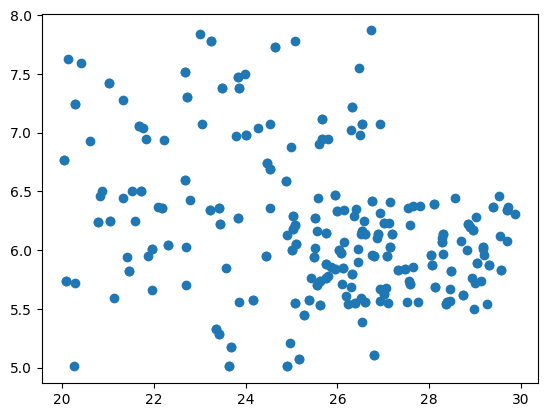

In [15]:
plt.scatter(df2['Temperature'], df2['pH'])
plt.show()


In [23]:
c = np.corrcoef(df2['pH'],df2['K'])
print(c)

[[ 1.         -0.03421423]
 [-0.03421423  1.        ]]


In [6]:
corr = df2.corr(method = 'pearson')
plt.figure(figsize=(5,5), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()


NameError: name 'df2' is not defined

# combining fertilizer prediction 1 and 2

In [11]:
df1 = pd.read_csv("../datasets/fertilizer_prediction1.csv")
df1

,Temperature,Humidity,Moisture,pH,N,P,K,Crop,Fertilizer
0,29,58,33,6.22,9,30,7,Oil seeds,MOP
1,29,58,33,6.21,9,30,7,Oil seeds,Urea
2,27,53,34,6.44,42,0,0,Oil seeds,MOP
3,27,53,34,6.45,42,0,0,Oil seeds,DAP
4,30,60,26,6.13,8,30,9,Oil seeds,MOP
...,...,...,...,...,...,...,...,...,...
143,28,54,37,6.39,36,0,0,Millets,MOP
144,33,64,34,6.05,38,0,0,Pulses,DAP
145,33,64,34,6.04,38,0,0,Pulses,MOP
146,30,60,27,6.14,12,40,0,Sugarcane,MOP


In [12]:
df2 = pd.read_csv("../datasets/fertilizer_prediction2.csv")
df2

,Temperature,Humidity,Moisture,pH,N,P,K,Crop,Fertilizer
0,24.87,82.84,295.61,6.59,4.0,2.0,2.5,rice,DAP
1,24.87,82.84,295.61,6.59,4.0,2.0,2.5,rice,MOP
2,28.69,96.65,178.96,6.08,4.0,4.0,4.0,Coconut,Good NPK
3,20.27,81.64,270.44,5.01,4.0,4.0,2.0,rice,MOP
4,25.07,95.02,192.90,5.55,2.0,2.1,3.5,Coconut,Urea
...,...,...,...,...,...,...,...,...,...
290,24.17,83.73,257.03,5.58,2.0,2.1,3.5,rice,Urea
291,24.17,83.73,257.03,5.58,2.0,2.1,3.5,rice,DAP
292,26.23,83.84,286.51,5.54,4.2,2.3,3.2,rice,DAP
293,23.83,84.81,298.56,6.27,2.5,4.0,2.0,rice,Urea


In [13]:
df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()

In [14]:
df1.columns[:-2]

Index(['Temperature', 'Humidity', 'Moisture', 'pH', 'N', 'P', 'K'], dtype='object')

In [15]:
for column in df1.columns[:-2]:
    df1[column] = (df1[column] - df1[column].mean()) / df1[column].std()
for column in df2.columns[:-2]:
    df2[column] = (df2[column] - df2[column].mean()) / df2[column].std()


In [16]:
df1

,Temperature,Humidity,Moisture,pH,N,P,K,Crop,Fertilizer
0,-0.444960,-0.268375,-0.885680,0.125421,-0.889022,0.760390,0.744039,Oil seeds,MOP
1,-0.444960,-0.268375,-0.885680,0.079475,-0.889022,0.760390,0.744039,Oil seeds,Urea
2,-1.007815,-1.117081,-0.798814,1.136240,1.720343,-1.252807,-0.582681,Oil seeds,MOP
3,-1.007815,-1.117081,-0.798814,1.182186,1.720343,-1.252807,-0.582681,Oil seeds,DAP
4,-0.163532,0.071108,-1.493742,-0.288096,-0.968094,0.760390,1.123102,Oil seeds,MOP
...,...,...,...,...,...,...,...,...,...
143,-0.726387,-0.947339,-0.538217,0.906508,1.245913,-1.252807,-0.582681,Millets,MOP
144,0.680750,0.750073,-0.798814,-0.655666,1.404056,-1.252807,-0.582681,Pulses,DAP
145,0.680750,0.750073,-0.798814,-0.701612,1.404056,-1.252807,-0.582681,Pulses,MOP
146,-0.163532,0.071108,-1.406876,-0.242149,-0.651807,1.431456,-0.582681,Sugarcane,MOP


In [17]:
df2

,Temperature,Humidity,Moisture,pH,N,P,K,Crop,Fertilizer
0,-0.261320,-0.859818,2.086109,0.643318,1.196190,-1.104520,-0.491253,rice,DAP
1,-0.261320,-0.859818,2.086109,0.643318,1.196190,-1.104520,-0.491253,rice,MOP
2,1.269565,1.248405,-0.609363,-0.182371,1.196190,1.006484,1.669576,Coconut,Good NPK
3,-2.104793,-1.043009,1.504497,-1.914698,1.196190,1.006484,-1.211529,rice,MOP
4,-0.181169,0.999571,-0.287247,-1.040439,-1.041452,-0.998970,0.949300,Coconut,Urea
...,...,...,...,...,...,...,...,...,...
290,-0.541848,-0.723951,1.194627,-0.991869,-1.041452,-0.998970,0.949300,rice,Urea
291,-0.541848,-0.723951,1.194627,-0.991869,-1.041452,-0.998970,0.949300,rice,DAP
292,0.283707,-0.707158,1.875832,-1.056629,1.419954,-0.787870,0.517134,rice,DAP
293,-0.678105,-0.559079,2.154275,0.125239,-0.482041,1.006484,-1.211529,rice,Urea


In [18]:
df1.to_csv('../datasets/fertilizer_prediction1.csv', index = False)
df2.to_csv('../datasets/fertilizer_prediction2.csv', index = False)


In [19]:
df = pd.read_csv("../datasets/fertilizer_prediction1.csv")
df

,Temperature,Humidity,Moisture,pH,N,P,K,Crop,Fertilizer
0,-0.444960,-0.268375,-0.885680,0.125421,-0.889022,0.760390,0.744039,Oil seeds,MOP
1,-0.444960,-0.268375,-0.885680,0.079475,-0.889022,0.760390,0.744039,Oil seeds,Urea
2,-1.007815,-1.117081,-0.798814,1.136240,1.720343,-1.252807,-0.582681,Oil seeds,MOP
3,-1.007815,-1.117081,-0.798814,1.182186,1.720343,-1.252807,-0.582681,Oil seeds,DAP
4,-0.163532,0.071108,-1.493742,-0.288096,-0.968094,0.760390,1.123102,Oil seeds,MOP
...,...,...,...,...,...,...,...,...,...
438,-0.541848,-0.723951,1.194627,-0.991869,-1.041452,-0.998970,0.949300,rice,Urea
439,-0.541848,-0.723951,1.194627,-0.991869,-1.041452,-0.998970,0.949300,rice,DAP
440,0.283707,-0.707158,1.875832,-1.056629,1.419954,-0.787870,0.517134,rice,DAP
441,-0.678105,-0.559079,2.154275,0.125239,-0.482041,1.006484,-1.211529,rice,Urea


In [20]:
for column in df.columns[:-2]:
    df[column] = (df[column] - df[column].mean()) / df[column].std()
df

,Temperature,Humidity,Moisture,pH,N,P,K,Crop,Fertilizer
0,-0.445464,-0.268679,-0.886684,0.125563,-0.890029,0.761252,0.744882,Oil seeds,MOP
1,-0.445464,-0.268679,-0.886684,0.079565,-0.890029,0.761252,0.744882,Oil seeds,Urea
2,-1.008957,-1.118346,-0.799720,1.137527,1.722292,-1.254227,-0.583341,Oil seeds,MOP
3,-1.008957,-1.118346,-0.799720,1.183525,1.722292,-1.254227,-0.583341,Oil seeds,DAP
4,-0.163717,0.071188,-1.495435,-0.288422,-0.969191,0.761252,1.124374,Oil seeds,MOP
...,...,...,...,...,...,...,...,...,...
438,-0.542462,-0.724771,1.195981,-0.992993,-1.042632,-1.000102,0.950375,rice,Urea
439,-0.542462,-0.724771,1.195981,-0.992993,-1.042632,-1.000102,0.950375,rice,DAP
440,0.284029,-0.707960,1.877957,-1.057827,1.421563,-0.788762,0.517720,rice,DAP
441,-0.678873,-0.559713,2.156716,0.125381,-0.482587,1.007624,-1.212902,rice,Urea


In [21]:
df = df.drop_duplicates()
df

,Temperature,Humidity,Moisture,pH,N,P,K,Crop,Fertilizer
0,-0.445464,-0.268679,-0.886684,0.125563,-0.890029,0.761252,0.744882,Oil seeds,MOP
1,-0.445464,-0.268679,-0.886684,0.079565,-0.890029,0.761252,0.744882,Oil seeds,Urea
2,-1.008957,-1.118346,-0.799720,1.137527,1.722292,-1.254227,-0.583341,Oil seeds,MOP
3,-1.008957,-1.118346,-0.799720,1.183525,1.722292,-1.254227,-0.583341,Oil seeds,DAP
4,-0.163717,0.071188,-1.495435,-0.288422,-0.969191,0.761252,1.124374,Oil seeds,MOP
...,...,...,...,...,...,...,...,...,...
438,-0.542462,-0.724771,1.195981,-0.992993,-1.042632,-1.000102,0.950375,rice,Urea
439,-0.542462,-0.724771,1.195981,-0.992993,-1.042632,-1.000102,0.950375,rice,DAP
440,0.284029,-0.707960,1.877957,-1.057827,1.421563,-0.788762,0.517720,rice,DAP
441,-0.678873,-0.559713,2.156716,0.125381,-0.482587,1.007624,-1.212902,rice,Urea


In [22]:
df.to_csv('../datasets/fertilizer_prediction1.csv', index = False)


In [23]:
for x in df.columns[:-2]:
    rounded_x = [*map(lambda xx:round(xx,2),x)]
    rounded_x

TypeError: type str doesn't define __round__ method

In [25]:
df['Humidity'] = [*map(lambda xx:round(xx,2),df['Humidity'])]
df['Moisture'] = [*map(lambda xx:round(xx,2),df['Moisture'])]
df['pH'] = [*map(lambda xx:round(xx,2),df['pH'])]
df['N'] = [*map(lambda xx:round(xx,2),df['N'])]
df['P'] = [*map(lambda xx:round(xx,2),df['P'])]
df['K'] = [*map(lambda xx:round(xx,2),df['K'])]
df

,Temperature,Humidity,Moisture,pH,N,P,K,Crop,Fertilizer
0,-0.45,-0.27,-0.89,0.13,-0.89,0.76,0.74,Oil seeds,MOP
1,-0.45,-0.27,-0.89,0.08,-0.89,0.76,0.74,Oil seeds,Urea
2,-1.01,-1.12,-0.80,1.14,1.72,-1.25,-0.58,Oil seeds,MOP
3,-1.01,-1.12,-0.80,1.18,1.72,-1.25,-0.58,Oil seeds,DAP
4,-0.16,0.07,-1.50,-0.29,-0.97,0.76,1.12,Oil seeds,MOP
...,...,...,...,...,...,...,...,...,...
438,-0.54,-0.72,1.20,-0.99,-1.04,-1.00,0.95,rice,Urea
439,-0.54,-0.72,1.20,-0.99,-1.04,-1.00,0.95,rice,DAP
440,0.28,-0.71,1.88,-1.06,1.42,-0.79,0.52,rice,DAP
441,-0.68,-0.56,2.16,0.13,-0.48,1.01,-1.21,rice,Urea


In [26]:
df.to_csv('../datasets/fertilizer_prediction1.csv', index = False)


In [27]:
df.drop_duplicates()
df

,Temperature,Humidity,Moisture,pH,N,P,K,Crop,Fertilizer
0,-0.45,-0.27,-0.89,0.13,-0.89,0.76,0.74,Oil seeds,MOP
1,-0.45,-0.27,-0.89,0.08,-0.89,0.76,0.74,Oil seeds,Urea
2,-1.01,-1.12,-0.80,1.14,1.72,-1.25,-0.58,Oil seeds,MOP
3,-1.01,-1.12,-0.80,1.18,1.72,-1.25,-0.58,Oil seeds,DAP
4,-0.16,0.07,-1.50,-0.29,-0.97,0.76,1.12,Oil seeds,MOP
...,...,...,...,...,...,...,...,...,...
438,-0.54,-0.72,1.20,-0.99,-1.04,-1.00,0.95,rice,Urea
439,-0.54,-0.72,1.20,-0.99,-1.04,-1.00,0.95,rice,DAP
440,0.28,-0.71,1.88,-1.06,1.42,-0.79,0.52,rice,DAP
441,-0.68,-0.56,2.16,0.13,-0.48,1.01,-1.21,rice,Urea
